In [1]:
!pip3 install missingno

ERROR: Exception:
Traceback (most recent call last):
  File "c:\program files\python\python36\lib\site-packages\pip\_internal\cli\base_command.py", line 186, in _main
    status = self.run(options, args)
  File "c:\program files\python\python36\lib\site-packages\pip\_internal\commands\install.py", line 258, in run
    isolated_mode=options.isolated_mode,
  File "c:\program files\python\python36\lib\site-packages\pip\_internal\commands\install.py", line 604, in decide_user_install
    if site_packages_writable(root=root_path, isolated=isolated_mode):
  File "c:\program files\python\python36\lib\site-packages\pip\_internal\commands\install.py", line 549, in site_packages_writable
    test_writable_dir(d) for d in set(get_lib_location_guesses(**kwargs))
  File "c:\program files\python\python36\lib\site-packages\pip\_internal\commands\install.py", line 549, in <genexpr>
    test_writable_dir(d) for d in set(get_lib_location_guesses(**kwargs))
  File "c:\program files\python\python36\lib\si

In [2]:
!pip3 install plotly

ERROR: Exception:
Traceback (most recent call last):
  File "c:\program files\python\python36\lib\site-packages\pip\_internal\cli\base_command.py", line 186, in _main
    status = self.run(options, args)
  File "c:\program files\python\python36\lib\site-packages\pip\_internal\commands\install.py", line 258, in run
    isolated_mode=options.isolated_mode,
  File "c:\program files\python\python36\lib\site-packages\pip\_internal\commands\install.py", line 604, in decide_user_install
    if site_packages_writable(root=root_path, isolated=isolated_mode):
  File "c:\program files\python\python36\lib\site-packages\pip\_internal\commands\install.py", line 549, in site_packages_writable
    test_writable_dir(d) for d in set(get_lib_location_guesses(**kwargs))
  File "c:\program files\python\python36\lib\site-packages\pip\_internal\commands\install.py", line 549, in <genexpr>
    test_writable_dir(d) for d in set(get_lib_location_guesses(**kwargs))
  File "c:\program files\python\python36\lib\si

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

import missingno as msno 

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline

In [4]:
df_train=pd.read_csv('./houseprices/train.csv')
df_test=pd.read_csv('./houseprices/test.csv')
print(df_train.shape, df_test.shape)


(1460, 81) (1459, 80)


In [5]:
#null?
for col in df_train.columns :
    if df_train[col].isnull().sum() != 0 :
        print(f'{col} : {df_train[col].isnull().sum() / df_train[col].shape[0]}')

LotFrontage : 0.1773972602739726
Alley : 0.9376712328767123
MasVnrType : 0.005479452054794521
MasVnrArea : 0.005479452054794521
BsmtQual : 0.025342465753424658
BsmtCond : 0.025342465753424658
BsmtExposure : 0.026027397260273973
BsmtFinType1 : 0.025342465753424658
BsmtFinType2 : 0.026027397260273973
Electrical : 0.0006849315068493151
FireplaceQu : 0.4726027397260274
GarageType : 0.05547945205479452
GarageYrBlt : 0.05547945205479452
GarageFinish : 0.05547945205479452
GarageQual : 0.05547945205479452
GarageCond : 0.05547945205479452
PoolQC : 0.9952054794520548
Fence : 0.8075342465753425
MiscFeature : 0.963013698630137


In [6]:
#상관관계를 살펴보자. feature를 독립 1 - 종속 n 으로 관계를 그리고 관계값이 0.3이상인 것을 추출할 수 있다.
corr_mat = df_train.corr()
print(corr_mat)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

In [7]:
#자기 자신과는 1:1
top_corr_features = corr_mat.index[abs(corr_mat["SalePrice"])>=0.3]
top_corr_features
#관계가 높은 feature들을 사용.

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [8]:
df_train[top_corr_features].isnull().sum()

LotFrontage     259
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
SalePrice         0
dtype: int64

In [9]:
#null이 0.5이상인 것은 제외
chk = (df_train.isnull().sum() / df_train.shape[0]) # null의 비율
#null의 비율으 담은 오브젝트 [ 그 중 0.5 이상인 것]
chk[chk >= 0.5]
#아래 컬럼은 제외.

Alley          0.937671
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [10]:
rm_col = chk[chk >= 0.5].keys() #컬럼
df_train=df_train.drop(rm_col, axis=1)
df_test=df_test.drop(rm_col,axis=1)

In [11]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [12]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [13]:
#text를 인코딩
#dummy를 활용한 one-hot encoding

In [14]:
#먼저, 수치형과 카테고리형을 구분할 수 있다.
#카테고리형 -> String
df_train_obj = df_train.select_dtypes(include="object")
df_train_num = df_train.select_dtypes(exclude="object")

df_test_obj = df_test.select_dtypes(include="object")
df_test_num = df_test.select_dtypes(exclude="object")

In [15]:
print('train', df_train_obj.shape, df_train_num.shape)
print('test', df_test_obj.shape, df_test_num.shape)

train (1460, 39) (1460, 38)
test (1459, 39) (1459, 37)


In [16]:
df_train_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [17]:
#pandas의 dummy이용

dummies = pd.get_dummies(df_train_obj, drop_first=True)
dummies_test = pd.get_dummies(df_test_obj, drop_first=True)

In [18]:
def find(x) :
    if x not in dummies_test.columns :
        return x
drop_train=list(filter(find,dummies.columns))

#test가 가지고 있지 않은 컬럼이 train에 있음.

In [19]:
dummies=dummies.drop(drop_train,axis=1)

In [20]:
print(dummies.shape, dummies_test.shape)

(1460, 184) (1459, 184)


In [21]:
#null값을 채우기
for col in df_train_num.columns :
    if df_train_num[col].isnull().sum() != 0 :
        print(f'{col} : {df_train[col].isnull().sum() / df_train[col].shape[0]}')
        print(df_train_num[col].describe()['mean'])
        print()
        df_train_num.loc[df_train_num[col].isnull()] = df_train_num[col].describe()['mean']
        

LotFrontage : 0.1773972602739726
70.04995836802665

MasVnrArea : 0.005479452054794521
96.88716589911867

GarageYrBlt : 0.05547945205479452
1613.643767830244



In [22]:
for col in df_test_num.columns :
    if df_test_num[col].isnull().sum() != 0 :
        print(f'{col} : {df_test[col].isnull().sum() / df_test[col].shape[0]}')
        print(df_test_num[col].describe()['mean'])
        print()
        df_test_num.loc[df_test_num[col].isnull()] = df_test_num[col].describe()['mean']

LotFrontage : 0.15558601782042494
68.58035714285714

MasVnrArea : 0.01028101439342015
93.04885433109686

BsmtFinSF1 : 0.0006854009595613434
366.7196697318719

BsmtFullBath : 0.0013708019191226869
11.98559543127743

GarageYrBlt : 0.053461274845784786
1646.8953706596258



In [23]:
#encoding & null df merge
df_train = pd.merge(dummies, df_train_num, left_index=True, right_index=True)
df_test = pd.merge(dummies_test, df_test_num, left_index=True, right_index=True)

In [24]:
print(df_train.shape, df_test.shape)

(1460, 222) (1459, 221)


In [25]:
#train test split
x_train=df_train.drop('SalePrice', axis=1).values
Target =df_train['SalePrice'].values
x_test=df_test.values
from sklearn import metrics
from sklearn.model_selection import train_test_split

x_tr,x_vld,y_tr,y_vld = train_test_split(x_train, Target, test_size=0.3, random_state=2018)

In [26]:
!pip install xgboost

In [41]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [93]:

param = {
    'max_depth' : [2,3,4],
    'n_estimators':range(550,700,50),
    'colsample_bytree' : [0.5,0.7,1],
    'colsample_bylevele' : [0.5,0.7,1],
}

#최적의 파라미터를 설정하는데 gridsearch를 이용 -> 검증은 cross-validation (5번 돌림)
model = xgb.XGBRegressor()
grid_search =  GridSearchCV(estimator=model, param_grid=param, cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)
#n_jobs 병렬 처리 갯수 -1은 전부한다는 것.

grid_search

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4], 'n_estimators': range(550, 700, 50), 'colsample_bytree': [0.5, 0.7, 1], 'colsample_bylevele': [0.5, 0.7, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [94]:
#fit을 하면 해당 데이터를 기반으로 최적의 파라미터가 무엇인지 알려준다.
grid_search.fit(x_tr,y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4], 'n_estimators': range(550, 700, 50), 'colsample_bytree': [0.5, 0.7, 1], 'colsample_bylevele': [0.5, 0.7, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [95]:
print(grid_search.best_params_)
#검색된 최적의 파라미터를 본다.

{'colsample_bylevele': 0.5, 'colsample_bytree': 1, 'max_depth': 3, 'n_estimators': 650}


In [96]:
print(grid_search.best_estimator_)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bylevele=0.5, colsample_bynode=1, colsample_bytree=1,
       gamma=0, gpu_id=-1, importance_type='gain',
       interaction_constraints=None, learning_rate=0.300000012,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
       monotone_constraints=None, n_estimators=650, n_jobs=0,
       num_parallel_tree=1, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
       tree_method=None, validate_parameters=False, verbosity=None)


In [97]:
#정확도 검증을 위해 Mean Absolute Error 를 활용,
#정확도 검증에 MSE와 MAE 두방법이 있다.
from sklearn.metrics import mean_squared_error, mean_absolute_error
prediction = grid_search.predict(x_vld)
print(mean_absolute_error(y_vld,prediction))

14875.593923018796


In [98]:
#테스트
prediction_test=grid_search.predict(x_test)

In [99]:
prediction_test

array([133603.17 , 152796.61 , 180666.8  , ..., 178092.6  ,  42075.383,
       231526.83 ], dtype=float32)

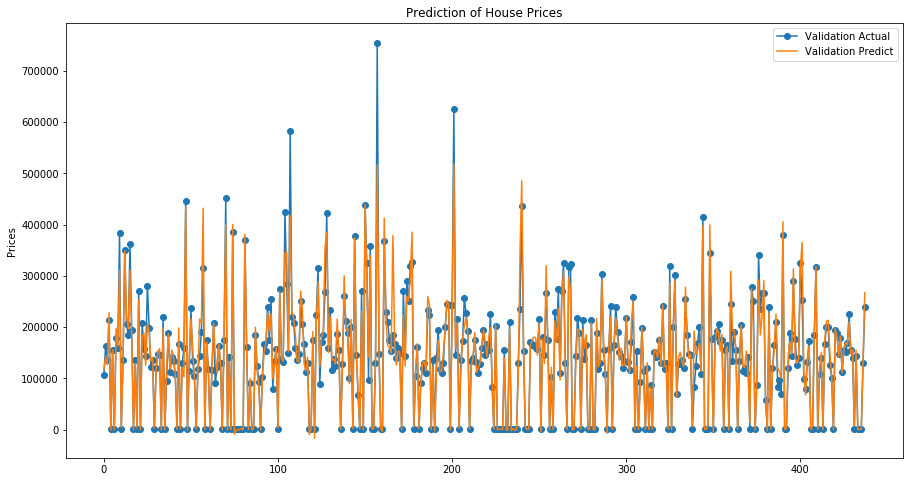

In [100]:
plt.figure(figsize=(15,8))
plt.plot(range(0, len(y_vld)), y_vld, 'o-', label='Validation Actual')
plt.plot(range(0, len(prediction)), prediction, '-', label='Validation Predict')
plt.title('Prediction of House Prices')
plt.ylabel('Prices')
plt.legend()

In [103]:
df_result=pd.read_csv('./houseprices/sample_submission.csv')
df_result['SalePrice'] = prediction_test
df_result.to_csv('./houseprices/sample_submission.csv', index=False)